In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# # library written for this exercise providing additional functions for assignment submission, and others
# import utils 

# # define the submission/grader object for this exercise
# grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

<a id="section1"></a>
## 1 Simple python and `numpy` function

In [21]:
def warm_up():
    A=np.eye(5)
    return A

warm_up()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 Linear regression with one variable
Loading data to data variable.

In [22]:
data=np.loadtxt(os.path.join('Data','ex1data1.txt'), delimiter=',')
X, y = data[:,0], data[:,1]
m=y.size

### 2.1 Plotting the Data

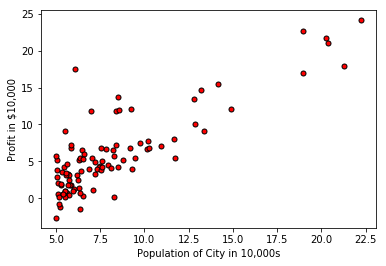

In [24]:
def plotData(x, y):
    fig = pyplot.figure()  # open a new figure
    pyplot.plot(x, y, 'ro', ms=5, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
plotData(X,y)

In [25]:
?pyplot.plot

<a id="section2"></a>
### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

#### 2.2.2 Implementation



In [27]:
X=np.stack([np.ones(m),X],axis=1)

In [29]:
def computeCost(X,y,theta):
    
    m=np.size(y)
    h = np.dot(X, theta)
    J=(1/(2*m)) * np.sum(np.square(np.dot(X,theta)-y))
    return J

In [30]:
np.size(y)
#np.dot(X,3) #mnozenie

97

In [31]:
computeCost(X,y,[0,0])
computeCost(X,y,[-1,2])

54.24245508201238

In [32]:
x=np.array([1,2,3])
np.dot(x,x)
y[:,None].shape

(97, 1)

<a id="section3"></a>
#### 2.2.4 Gradient descent

In [33]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=y.shape[0]
    theta=theta.copy()
    J_history=[]
    for j in range(num_iters):
        theta=theta-alpha/m *(np.dot(X,theta)-y).dot(X)
        #print(np.dot(X,theta))
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

In [34]:
theta=np.zeros(2)
iterations=1500
alpha=0.01
theta , J_history= gradientDescent(X,y,theta,alpha,iterations)

print(theta)

X

[-3.63029144  1.16636235]


array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

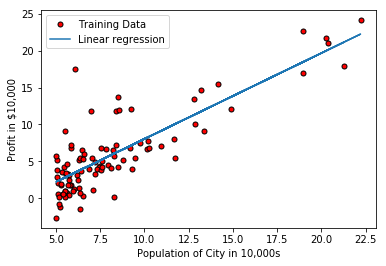

In [35]:
plotData(X[:,1],y)
pyplot.plot(X[:,1],np.dot(X,theta),'-')
pyplot.legend(['Training Data','Linear regression'])

In [36]:
p1=np.dot([1,3.5],theta)
p2=np.dot([1,7],theta)
print(p1*10000)
p2*10000

4519.7678677017675


45342.45012944714

In [37]:
#optional
data=np.loadtxt(os.path.join("Data","ex1data2.txt"),delimiter=',')

In [38]:
X=data[:,:2]
y=data[:,2]
m=y.size
print('{:8.0f}'.format(X[1,0]))

    1600


In [39]:
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


<a id="section4"></a>
### 3.1 Feature Normalization

In [40]:
def featureNormalize(X):
    X=X.copy()
    mu=np.zeros(X.shape[1])
    sigma=np.zeros(X.shape[1])
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm, mu, sigma
    

In [41]:
X.shape[1]
np.mean(X, axis=0)
np.std(X,axis=0)

array([7.86202619e+02, 7.52842809e-01])

In [42]:
X_norm, mu, sigma= featureNormalize(X)
mu
sigma

array([7.86202619e+02, 7.52842809e-01])

In [43]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


### 3.2 Compute Cost Multi

In [44]:
def computeCostMulti(X,y,theta):
    m=y.shape[0]
    J=0
    J=1/(2*m)*np.sum(np.square(np.dot(X,theta)-y))
    return J

In [45]:
y.shape[0]

47